# Script to evaluate model spatial prediction accuracy 

This script evaluates the overall and spatial accuacy of SWEMLv2.0

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib
import warnings
import SSWEET

#HOME = os.path.expanduser('~')
HOME = os.getcwd()
HOME = os.chdir('../..')
HOME = os.getcwd()

HOME

'/uufs/chpc.utah.edu/common/home/civil-group1/Johnson'

In [2]:
import pandas as pd

file = pd.read_parquet('/uufs/chpc.utah.edu/common/home/civil-group1/civil-group1/Johnson/SWEMLv2.0/Predictions/Sturm_Seasonality_PrecipVIIRSGeoObsDFs/750M_Resolution/20_fSCA_Thresh/20SWEthresh_All_Feats_HoldOut_2018-03-30.parquet')

file.head()

index                               cell_id       Date  cen_lat  cen_lon  \
0      0   SouthernRockies_750M_39.05_-106.703 2018-03-30   39.050 -106.703   
1   1497  SouthernRockies_750M_38.679_-106.507 2018-03-30   38.679 -106.507   
2    494  SouthernRockies_750M_38.929_-106.528 2018-03-30   38.929 -106.528   
3    495  SouthernRockies_750M_38.929_-106.521 2018-03-30   38.929 -106.521   
4    496  SouthernRockies_750M_38.929_-106.514 2018-03-30   38.929 -106.514   

   Elevation_m  Slope_Deg  Aspect_Deg      ns_1      ns_2  ...  \
0         3615         22         150  0.690321  0.664515  ...   
1         3766         66           7  0.470967  0.483870  ...   
2         3332         17         204  0.483870  0.509676  ...   
3         3382         16         214  0.483870  0.509676  ...   
4         3450         24         283  0.483870  0.509676  ...   

   Seasonal_ns_3_rel  Seasonal_ns_4_rel  Seasonal_ns_5_rel  Seasonal_ns_6_rel  \
0           0.699241           0.796566           0.711520           0.644832   
1           0.677955           0.750072           0.682396           0.664937   
2           0.682396           0.750072           0.693889           0.644832   
3           0.682396           0.750072           0.693889           0.644832   
4           0.682396           0.750072           0.693889           0.644832   

   sturm_value     swe_cm           region  region_class  ASO_swe_cm  \
0            1  28.435743  SouthernRockies             1   28.435743   
1            1  26.937088  SouthernRockies             1   26.937088   
2            2  10.087107  SouthernRockies             1   10.087107   
3            2  14.040701  SouthernRockies             1   14.040701   
4            2  18.933741  SouthernRockies             1   18.933741   

   XGBoost_swe_cm  
0       29.399479  
1       15.773273  
2       10.717057  
3       15.502641  
4       24.615059  

[5 rows x 37 columns]

In [2]:
date_basin = {'2015-04-06': 'Conejos',# - only one obs, likely poor Never seen prediction location
          '2015-04-07': 'Upper Rio Grande',
           '2018-03-30': 'Taylor',
          '2018-03-31': 'East',
          '2013-04-03': 'Tuolumne'
             }

date_region = {'2015-04-06': 'Rocky Mountains',# - only one obs, likely poor Never seen prediction location
          '2015-04-07': 'Rocky Mountains',
           '2018-03-30': 'Rocky Mountains',
          '2018-03-31': 'Rocky Mountains',
          '2013-04-03': 'Sierra Nevada Mountains'
              }

PDF = pd.DataFrame()
VDF = pd.DataFrame()
SWEDF = pd.DataFrame()

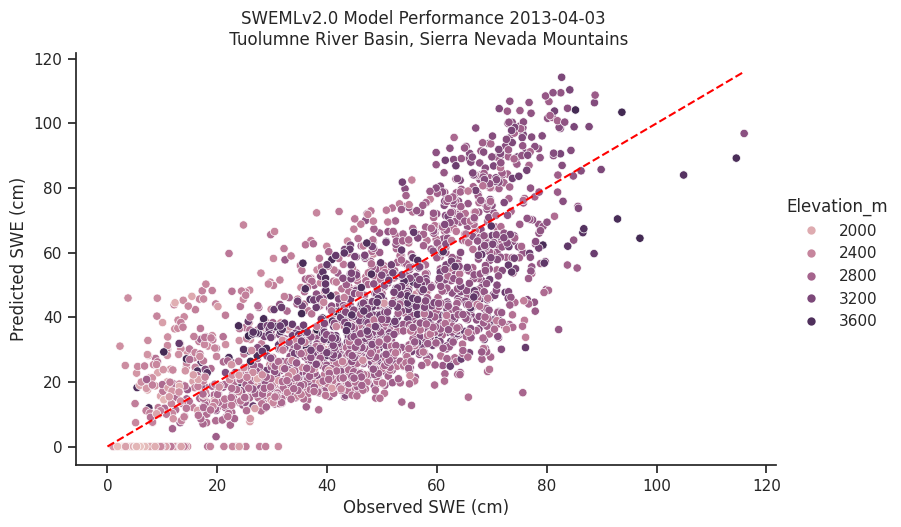

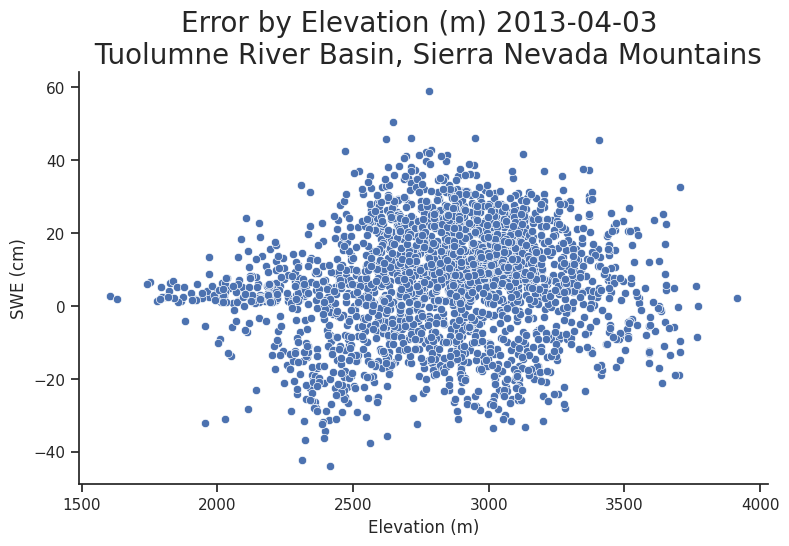

Error = observations - predictions
Error = observations - predictions
Error = observations - predictions


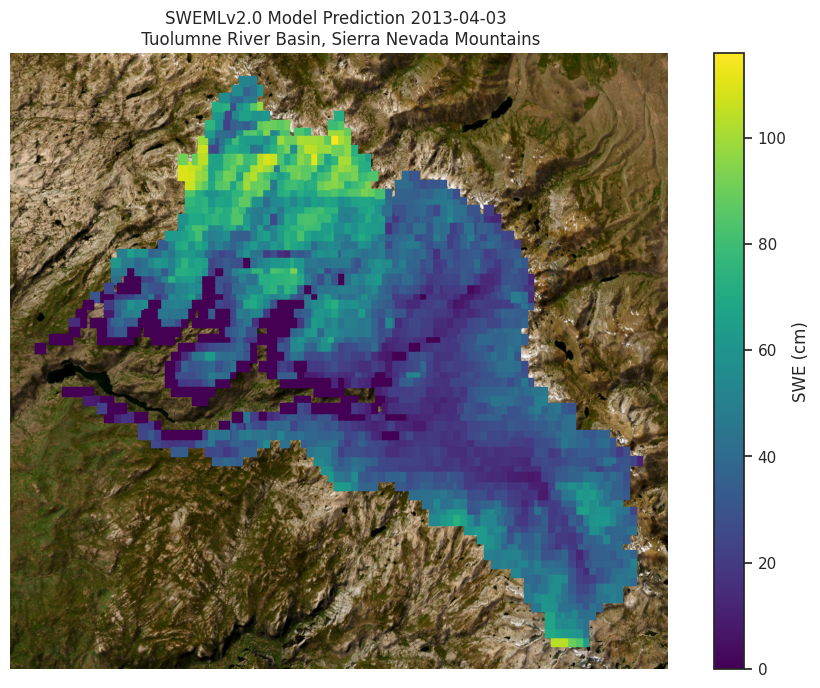

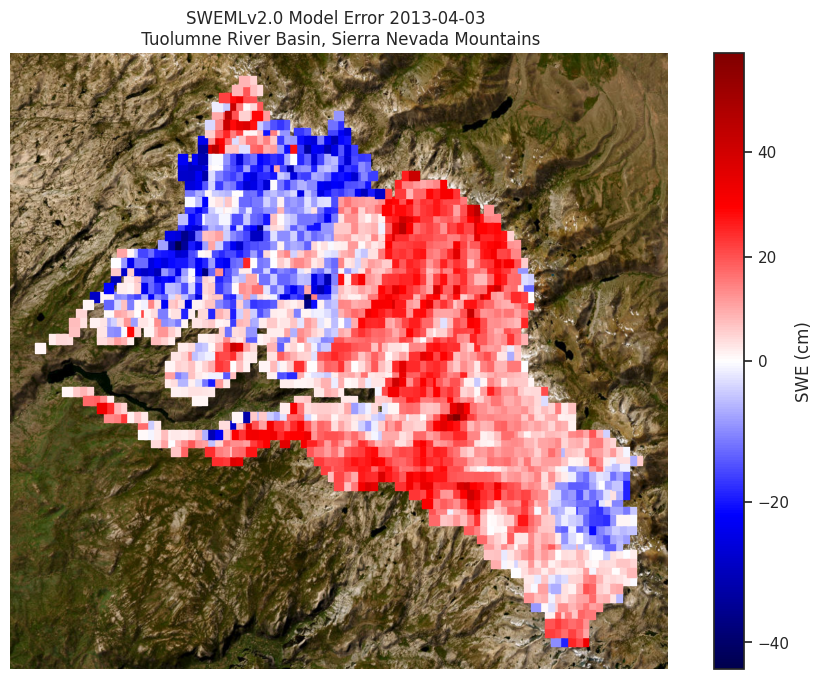

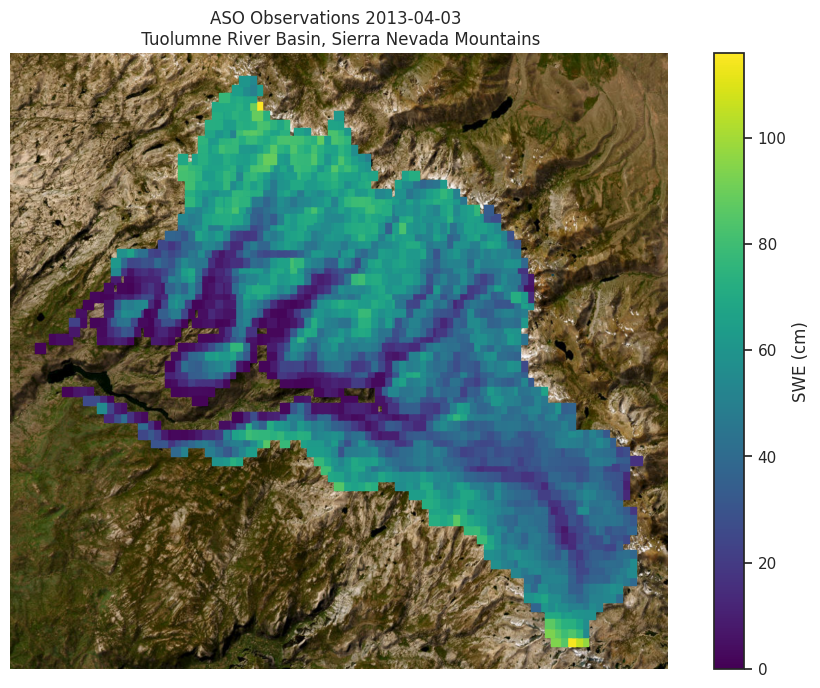

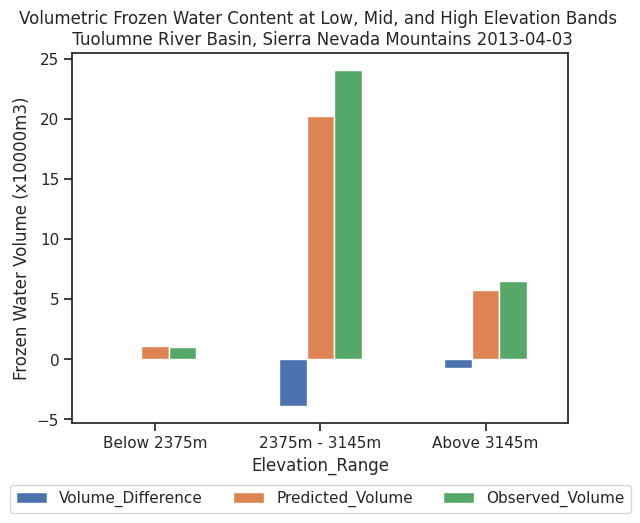

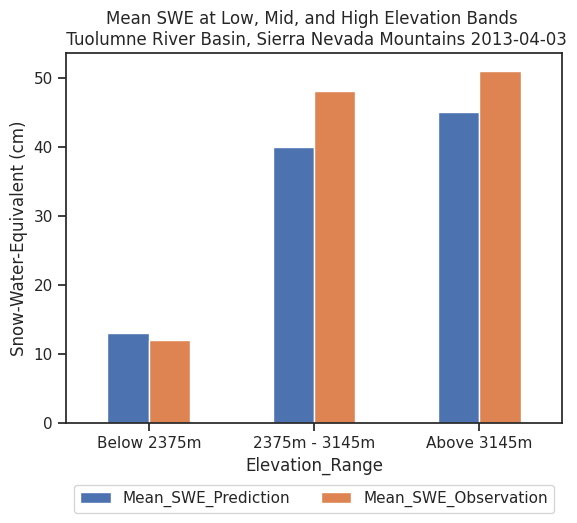

In [15]:

#Model run
dates = [
     #'2016-03-29', #Olympic
#          '2015-04-06', #Conejos - only one obs, likely poor Never seen prediction location
#          '2015-04-07', #upper Rio Grande
#           '2018-03-30', #Taylor
#          '2018-03-31', #East
#          '2013-04-03', #Tuolumne
            '2013-04-29', #Tuolumne
#           '2015-04-12', #Kings
#           '2019-03-25' #San Joaquin'
#           '2019-03-29' #Merced
        # '2019-03-24'
         ]

Res =[#'500M_Resolution', 
      '750M_Resolution', 
      #'1000M_Resolution'
]

alldata = False
standard = True
nestimators = 3500
ntrees = 8
eta = 0.1

for output_res in Res:
    for date in dates:


        DataFrame = 'Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
        fSCA_thresh = '20_fSCA_Thresh'
        # date =  '2013-04-29'
        region = date_region[date]
        watershed = date_basin[date]
        markersize = 45


        #Prediction path
        Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

        #Load data
        #EvalDF = pd.read_parquet(f"{Ppath}/All_Feats_HoldOut_03-29-2019.parquet")
        EvalDF = pd.read_parquet(f"{Ppath}/20SWEthresh_All_Feats_HoldOut_{date}.parquet")

        #Change obs/pred column names if necessary
        EvalDF.rename(columns={'ASO_swe_cm':'y_test','XGBoost_swe_cm':'y_pred'}, inplace=True)

        #just get swe >1cm
        EvalDF = EvalDF[EvalDF['y_test']>1]

        #Parity Plot
        savfig = True
        Performance = SSWEET.parityplot(EvalDF, savfig, region, watershed, date)
        Performance

        savfig = True
        #Error vs Elevation
        SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error', savfig, region, watershed, date)
        # SSWEET.Model_Vs(EvalDF,'Aspect_Deg', 'Error', savfig, region, watershed, date)
        # SSWEET.Model_Vs(EvalDF,'Slope_Deg', 'Error', savfig, region, watershed, date)
        # SSWEET.Model_Vs(EvalDF,'sturm_value', 'Error', savfig, region, watershed, date)
        # SSWEET.Model_Vs(EvalDF,'season_precip_cm', 'Error', savfig, region, watershed, date)


        #spatial
        cmap = 'viridis' # use seismic for error, viridis or blues for preds/obs
        var =  'y_pred' #'error'
        var_short = 'Prediction'
        Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, {region}'
        savfig = True
        variant = 'World_Imagery'
        figname = f"./SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_spatial_{var}_{date}_{output_res}"


        SSWEET.SpatialAnalysis(EvalDF, markersize, cmap, var,Title, savfig, variant, figname)

        #spatial
        cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
        var =  'error' #'error'
        var_short = 'Error'
        Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, {region}'
        savfig = True
        variant = 'World_Imagery'
        figname = f"./SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_spatial_{var}_{date}_{output_res}"


        SSWEET.SpatialAnalysis(EvalDF, markersize, cmap, var,Title, savfig, variant, figname)

        #spatial
        cmap = 'viridis' # use seismic for error, viridis or blues for preds/obs
        var =  'y_test' #'error'
        var_short = 'ASO Observations'
        Title = f'{var_short} {date} \n {watershed} River Basin, {region}'
        savfig = True
        variant = 'World_Imagery'
        figname = f"./SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_spatial_{var}_{date}_{output_res}"


        SSWEET.SpatialAnalysis(EvalDF, markersize, cmap, var,Title, savfig, variant, figname)

#         cmap = 'cool' # use seismic for error, viridis or blues for preds/obs
#         var =  'season_precip_cm' #'error'
#         var_short = 'Precipitation'
#         Title = f'{var_short} {date} \n {watershed} River Basin, {region}'
#         savfig = True
#         variant = 'World_Imagery'
#         figname = f"./SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_spatial_{var}_{date}_{output_res}"


#         SSWEET.SpatialAnalysis(EvalDF, markersize, cmap, var,Title, savfig, variant, figname)

        cols =['Volume_Difference', 'Predicted_Volume', 'Observed_Volume']
        scaler = 10000
        ylab = f'Frozen Water Volume (x{scaler}m3)'
        ncol = 3
        Title = f'Volumetric Frozen Water Content at Low, Mid, and High Elevation Bands \n {watershed} River Basin, {region} {date}'
        save = True
        figname = f"SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_SWEVol_{date}_{output_res}.png"

        Vdf = SSWEET.barplot(EvalDF, cols, scaler, ylab, ncol, Title, save, figname)
        Vdf['watershed'] = watershed
        Vdf['Date'] = date

        cols =['Mean_SWE_Prediction', 'Mean_SWE_Observation']
        scaler = 1
        ylab = f'Snow-Water-Equivalent (cm)'
        ncol = 3
        Title = f'Mean SWE at Low, Mid, and High Elevation Bands \n {watershed} River Basin, {region} {date}'
        save = True
        figname = f"SWEMLv2.0/Evaluation/Figures/{region}_{watershed}_MeanSWE_{date}_{output_res}.png"

        SWEdf = SSWEET.barplot(EvalDF, cols, scaler, ylab, ncol, Title, save, figname)
        SWEdf['watershed'] = watershed
        SWEdf['Date'] = date


        cols = ['RMSE', 'KGE', 'PBias']
        Performance = Performance[cols]
        Performance['watershed'] = watershed
        Performance['Date'] = date
        Performance['Resolution'] = output_res
        PDF = pd.concat([PDF, Performance])
        VDF = pd.concat([VDF, Vdf])
        SWEDF = pd.concat([SWEDF, SWEdf])

In [14]:
#Testing with Tuolumne


PDF

RMSE   KGE  PBias watershed        Date       Resolution
0  17.549999  0.67  15.51  Tuolumne  2013-04-03  750M_Resolution
0  17.410000  0.67  14.24  Tuolumne  2013-04-03  750M_Resolution
0  16.190001  0.71  12.28  Tuolumne  2013-04-03  750M_Resolution
0  15.790000  0.72  13.75  Tuolumne  2013-04-03  750M_Resolution
0  16.600000  0.69   9.09  Tuolumne  2013-04-03  750M_Resolution

In [4]:
PDF

RMSE   KGE  PBias watershed        Date       Resolution
0  17.049999  0.68  11.59  Tuolumne  2013-04-03  750M_Resolution

In [ ]:
#Model run
dates = ['2014-03-20', #Uncompagdre
         ]

output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
date =  '2014-03-20'
region = 'Rockies'
watershed = 'Uncompagdre'
markersize = 10


#Prediction path
Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

#Load data
#EvalDF = pd.read_parquet(f"{Ppath}/All_Feats_HoldOut_03-29-2019.parquet")
EvalDF = pd.read_parquet(f"{Ppath}/0SWEthresh_All_Feats_HoldOut_{date}.parquet")


#spatial
cmap = 'viridis' # use seismic for error, viridis or blues for preds/obs
var =  'y_test' #'error'
var_short = 'ASO Observations'
Title = f'{var_short} {date} \n {watershed} River Basin, {region}'
savfig = True
variant = 'World_Imagery'
figname = f"./Figures/{region}_{watershed}_spatial_{var}_{date}_{output_res}"




In [27]:
PDF.sort_values('RMSE', inplace=True)
PDF.reset_index(inplace=True, drop=True)
PDF

RMSE   KGE  PBias         watershed        Date
0   7.53  0.60 -18.69             Kings  2015-04-12
1   9.57  0.53 -21.54            Taylor  2018-03-30
2  11.30  0.44 -47.03  Upper Rio Grande  2015-04-07
3  11.60  0.58  19.18           Olympic  2018-03-31
4  11.60  0.58  19.18              East  2018-03-31
5  11.61  0.85   3.37          Tuolumne  2013-04-29
6  18.15  0.04 -57.66           Conejos  2015-04-06
7  22.72  0.81  -5.18            Merced  2019-03-29
8  35.06  0.68  21.65       San Joaquin  2019-03-25

In [21]:
VDF

Volume_Difference  Predicted_Volume  Observed_Volume  \
Elevation_Range                                                         
Below 2057m                -7.8156           15.2080          23.0236   
2057m - 3019m             -98.6772          317.9799         416.6572   
Above 3019m               -17.7291          116.2705         133.9996   
Below 2106m                 2.5287            8.1658           5.6371   
2106m - 3007m               8.2565          260.0484         251.7919   
Above 3007m                 6.0463           73.5053          67.4590   
Below 3058m                 0.0133            1.7356           1.7223   
3058m - 3648m               6.0045           32.4474          26.4428   
Above 3648m                 0.5277            7.3737           6.8460   
Below 2632m                 0.6954            8.3638           7.6684   
2632m - 3275m              -2.9138           86.3649          89.2787   
Above 3275m                -1.5789           14.9927          16.5716   
Below 3079m                -2.3418           17.9922          20.3340   
3079m - 3605m             -16.3149           61.9286          78.2434   
Above 3605m                -4.3514           17.1066          21.4580   
Below 3153m                 6.0250            7.4851           1.4601   
3153m - 3552m              12.3429           28.7466          16.4037   
Above 3552m                -0.4831           12.7048          13.1879   
Below 3138m                 0.2652            1.2155           0.9503   
3138m - 3668m              33.2761           79.0337          45.7576   
Above 3668m                 4.2076           37.7012          33.4936   
Below 3266m                 3.8286           18.8528          15.0243   
3266m - 3699m               5.7516           34.7808          29.0292   
Above 3699m                 1.2026            7.2012           5.9986   
Below 3079m                -2.3418           17.9922          20.3340   
3079m - 3605m             -16.3149           61.9286          78.2434   
Above 3605m                -4.3514           17.1066          21.4580   

                        watershed        Date  
Elevation_Range                                
Below 2057m           San Joaquin  2019-03-25  
2057m - 3019m         San Joaquin  2019-03-25  
Above 3019m           San Joaquin  2019-03-25  
Below 2106m                Merced  2019-03-29  
2106m - 3007m              Merced  2019-03-29  
Above 3007m                Merced  2019-03-29  
Below 3058m                 Kings  2015-04-12  
3058m - 3648m               Kings  2015-04-12  
Above 3648m                 Kings  2015-04-12  
Below 2632m              Tuolumne  2013-04-29  
2632m - 3275m            Tuolumne  2013-04-29  
Above 3275m              Tuolumne  2013-04-29  
Below 3079m               Olympic  2018-03-31  
3079m - 3605m             Olympic  2018-03-31  
Above 3605m               Olympic  2018-03-31  
Below 3153m               Conejos  2015-04-06  
3153m - 3552m             Conejos  2015-04-06  
Above 3552m               Conejos  2015-04-06  
Below 3138m      Upper Rio Grande  2015-04-07  
3138m - 3668m    Upper Rio Grande  2015-04-07  
Above 3668m      Upper Rio Grande  2015-04-07  
Below 3266m                Taylor  2018-03-30  
3266m - 3699m              Taylor  2018-03-30  
Above 3699m                Taylor  2018-03-30  
Below 3079m                  East  2018-03-31  
3079m - 3605m                East  2018-03-31  
Above 3605m                  East  2018-03-31

In [22]:
SWEDF

Mean_SWE_Prediction  Mean_SWE_Observation         watershed  \
Elevation_Range                                                                
Below 2057m                     16.0                  24.0       San Joaquin   
2057m - 3019m                   88.0                 115.0       San Joaquin   
Above 3019m                    118.0                 136.0       San Joaquin   
Below 2106m                     33.0                  23.0            Merced   
2106m - 3007m                  102.0                  99.0            Merced   
Above 3007m                    122.0                 112.0            Merced   
Below 3058m                      5.0                   5.0             Kings   
3058m - 3648m                   15.0                  12.0             Kings   
Above 3648m                     13.0                  12.0             Kings   
Below 2632m                     14.0                  13.0          Tuolumne   
2632m - 3275m                   32.0                  33.0          Tuolumne   
Above 3275m                     35.0                  39.0          Tuolumne   
Below 3079m                     11.0                  13.0           Olympic   
3079m - 3605m                   25.0                  32.0           Olympic   
Above 3605m                     34.0                  43.0           Olympic   
Below 3153m                     22.0                   4.0           Conejos   
3153m - 3552m                   23.0                  13.0           Conejos   
Above 3552m                     30.0                  32.0           Conejos   
Below 3138m                      7.0                   5.0  Upper Rio Grande   
3138m - 3668m                   18.0                  11.0  Upper Rio Grande   
Above 3668m                     28.0                  25.0  Upper Rio Grande   
Below 3266m                     15.0                  12.0            Taylor   
3266m - 3699m                   29.0                  24.0            Taylor   
Above 3699m                     26.0                  22.0            Taylor   
Below 3079m                     11.0                  13.0              East   
3079m - 3605m                   25.0                  32.0              East   
Above 3605m                     34.0                  43.0              East   

                       Date  
Elevation_Range              
Below 2057m      2019-03-25  
2057m - 3019m    2019-03-25  
Above 3019m      2019-03-25  
Below 2106m      2019-03-29  
2106m - 3007m    2019-03-29  
Above 3007m      2019-03-29  
Below 3058m      2015-04-12  
3058m - 3648m    2015-04-12  
Above 3648m      2015-04-12  
Below 2632m      2013-04-29  
2632m - 3275m    2013-04-29  
Above 3275m      2013-04-29  
Below 3079m      2018-03-31  
3079m - 3605m    2018-03-31  
Above 3605m      2018-03-31  
Below 3153m      2015-04-06  
3153m - 3552m    2015-04-06  
Above 3552m      2015-04-06  
Below 3138m      2015-04-07  
3138m - 3668m    2015-04-07  
Above 3668m      2015-04-07  
Below 3266m      2018-03-30  
3266m - 3699m    2018-03-30  
Above 3699m      2018-03-30  
Below 3079m      2018-03-31  
3079m - 3605m    2018-03-31  
Above 3605m      2018-03-31

## Parity Plot

A parity plot is a scatterplot that compares a set of model estimates against benchmark data, i.e., the observations. Each point has coordinates (x, y), where x is a benchmark value and y is the corresponding value from the model. A parity plot is often the first visualization to investigate the skill of a model.

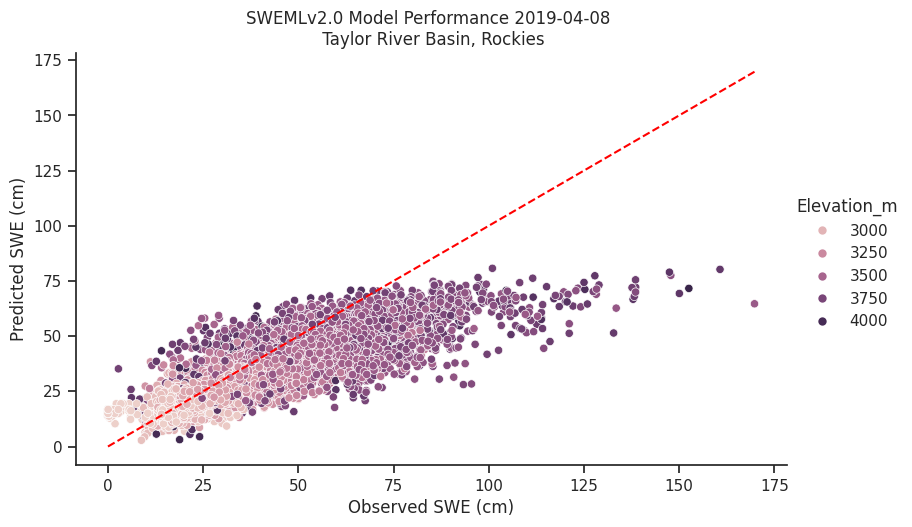

R2   RMSE   KGE  PBias  R2_fSCA  RMSE_fSCA  KGE_fSCA  PBias_fSCA
0  0.6  13.03  0.61  14.26      0.6      13.03      0.61       14.26

In [22]:
savfig = True

Performance = SSWEET.parityplot(EvalDF, savfig, region, watershed, date)
Performance

input_columns = [
            'cen_lat',	
            'cen_lon',	
            'Elevation_m',	
            'Slope_Deg',	
            'Aspect_Deg',	
            'ns_1',	
            'ns_2',	
            'ns_3',	
            'ns_4',	
            'ns_5',	
            #'ns_6',	
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            'ns_4_week_mean',
            'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            'Seasonal_ns_4_rel',
            'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
           # 'vegetation_value'
]

input_columns = [
            'cen_lat',	
            'cen_lon',	
            'Elevation_m',	
            'Slope_Deg',	
            'Aspect_Deg',	
            'ns_1',	
            'ns_2',	
            'ns_3',	
            'ns_4',	
            'ns_5',	
            #'ns_6',	
            #'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            'ns_4_week_mean',
            'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            'Seasonal_ns_4_rel',
            'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
            
]

## Percent Error compared to elevation
*note, error greater than |100%| is adjusted to |100%|

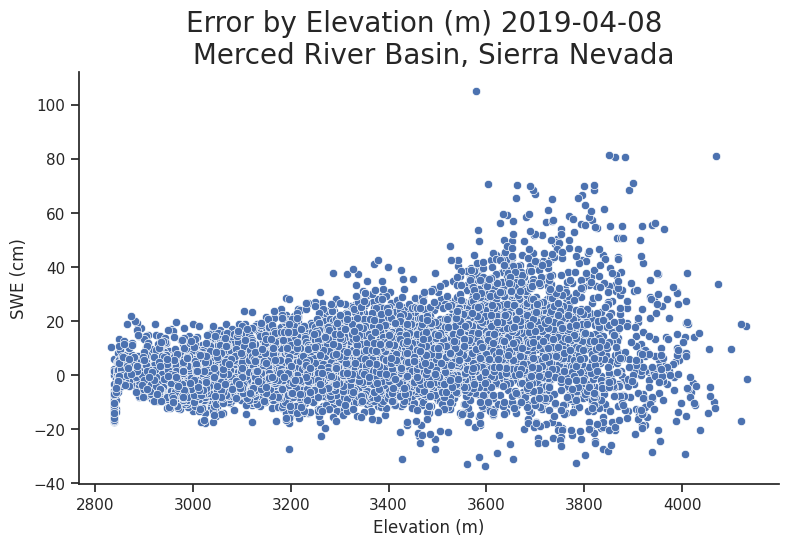

In [24]:
savfig = True
region = 'Sierra Nevada'
watershed = 'Merced'

SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error', savfig, region, watershed, date)

# Spatial Evaluation of the Model

Error = observations - predictions


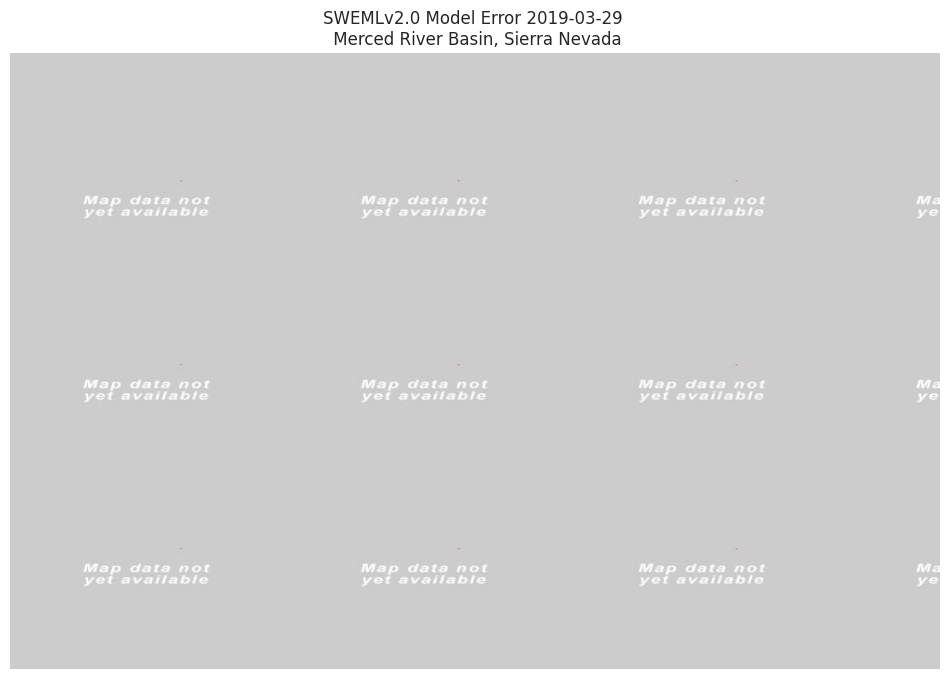

In [8]:
cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var =  'y_error' #'error'
var_short = 'Error'
Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, {region}'
savfig = True
variant = 'World_Imagery'
figname = f"./Figures/{region}_{watershed}_spatial_{var}_{date}"


SSWEET.SpatialAnalysis(EvalDF, 10, cmap, var,Title, savfig, variant, figname)

In [46]:
#File path
Ppath = f"{HOME}/SWEMLv2.0/data/ASO/Southwest/300M_SWE_parquet"

#Load data
ASOdf = pd.read_parquet(f"{Ppath}/ASO_300M_SWE_20190317.parquet")

ASOdf['swe_m'] = ASOdf['swe_m']*100
ASOdf['y_pred'] = 0
ASOdf['y_test'] = 0
ASOdf.head()

cen_lat     cen_lon  swe_m                         cell_id  y_pred  \
12587  36.724735 -118.931971    0.0  Southwest_300M_36.725_-118.932       0   
12588  36.724735 -118.929271    0.0  Southwest_300M_36.725_-118.929       0   
12589  36.724735 -118.926571    0.0  Southwest_300M_36.725_-118.927       0   
12591  36.724735 -118.921171    0.0  Southwest_300M_36.725_-118.921       0   
12592  36.724735 -118.918471    0.0  Southwest_300M_36.725_-118.918       0   

       y_test  
12587       0  
12588       0  
12589       0  
12591       0  
12592       0

In [23]:
ASOdf = ASOdf[ASOdf['swe_m']>0.01]

In [44]:
import importlib
importlib.reload(SSWEET)

<module 'SSWEET' from '/home/whitelightning450/SWEMLv2.0/Evaluation/SSWEET.py'>

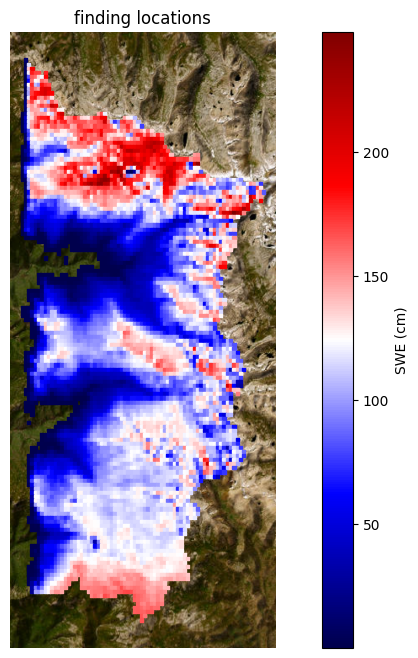

In [45]:
cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var =  'swe_m' #'error'
Title = 'finding locations'
savfig = False
variant = 'World_Imagery'
figname = 'findlocation'

SSWEET.SpatialAnalysis(ASOdf, cmap, var,Title, savfig, variant, figname)

In [37]:
EvalDF

Empty DataFrame
Columns: [cell_id, Date, cen_lat, cen_lon, Elevation_m, Slope_Deg, Aspect_Deg, ns_1, ns_2, ns_3, ns_4, ns_5, ns_6, VIIRS_SCA, hasSnow, season_precip_cm, DOS, WY_week, ns_1_week_mean, ns_2_week_mean, ns_3_week_mean, ns_4_week_mean, ns_5_week_mean, ns_6_week_mean, Seasonal_ns_1_rel, Seasonal_ns_2_rel, Seasonal_ns_3_rel, Seasonal_ns_4_rel, Seasonal_ns_5_rel, Seasonal_ns_6_rel, sturm_value, vegetation_value, swe_cm, region, region_class, y_test, y_pred]
Index: []

[0 rows x 37 columns]